In [1]:
radius = "r_1"

In [2]:
import numpy as np
import pandas as pd
import scipy.stats
import matplotlib.pyplot as plt
from statsmodels.discrete.discrete_model import NegativeBinomial
import matplotlib as mpl

In [3]:
# Reading the file
secondary_infections_data = pd.read_csv(f"NI_outputs/{radius}/secondary_infections_E.csv", dtype="float32", low_memory=False)
# secondary_infections_data = pd.read_csv("NI_outputs/r_0_2/secondary_infections.csv", dtype="float32", low_memory=False)

In [4]:
# Creating an array of all secondary infections
secondary_infections_data.dropna()
secondary_infections_only = secondary_infections_data.iloc[:, 2:-1].to_numpy()
secondary_infections_array = secondary_infections_only.flatten()

In [5]:
# Fit using statsmodels
data = secondary_infections_array[~np.isnan(secondary_infections_array)]
exog = np.ones(len(data))
result = NegativeBinomial(data, exog).fit()
result.summary()

Optimization terminated successfully.
         Current function value: 1.118142
         Iterations: 5
         Function evaluations: 12
         Gradient evaluations: 12


<class 'statsmodels.iolib.summary.Summary'>
"""
                     NegativeBinomial Regression Results                      
==============================================================================
Dep. Variable:                      y   No. Observations:              1833692
Model:               NegativeBinomial   Df Residuals:                  1833691
Method:                           MLE   Df Model:                            0
Date:                Mon, 27 Jan 2025   Pseudo R-squ.:               2.662e-11
Time:                        14:56:31   Log-Likelihood:            -2.0503e+06
converged:                       True   LL-Null:                   -2.0503e+06
Covariance Type:            nonrobust   LLR p-value:                       nan
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3611      0.002    144.827      0.000       0.356       0.366
alpha         10.7043      0.021    521.565      0.000      10.664      10.745
==============================================================================
"""

In [6]:
# Check that the mean and overdispersion parameter match the values obtained using a simple implementation (code not included here)
dispersion_param = result.params[1]
print('Overdispersion: {}'.format(dispersion_param))

mean_param = np.exp(result.params[0])
print('Mean: {}'.format(mean_param))

var_param = mean_param + dispersion_param * mean_param**2
print('Variance: {}'.format(var_param))

Overdispersion: 10.704297930710302
Mean: 1.4349487263946974
Variance: 23.47593146729474


In [7]:
# Parameter conversion and plotting code
p_hat = mean_param / var_param
n_hat = mean_param ** 2 / (var_param - mean_param)

estimated_distribution = scipy.stats.nbinom(n_hat, p_hat)

In [8]:
k = np.arange(10)
bar = [list(data).count(ki)/len(data) for ki in k]
estimated_distn = estimated_distribution.pmf(k)

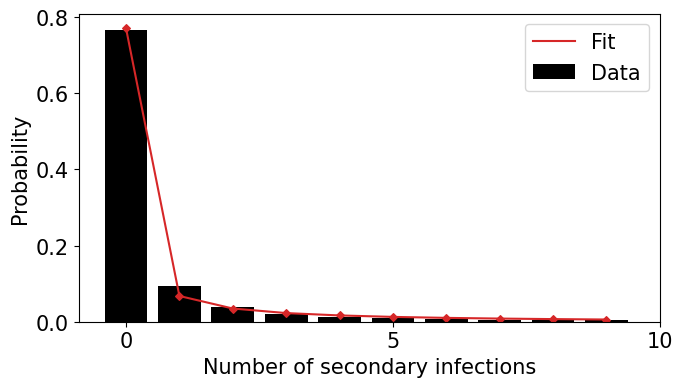

In [12]:
mpl.rcParams.update({'font.size': 15})
fig, ax = plt.subplots(figsize=(7.5, 4))

ax.bar(k, bar, color='k', label='Data')
ax.scatter(k, estimated_distn, s=15, marker='D', color='tab:red')
ax.plot(k, estimated_distn, color='tab:red', label='Fit')

ax.set_xticks(np.arange(0, 15, 5))
ax.set_xlabel("Number of secondary infections")
ax.set_ylabel('Probability')
ax.legend()

fig.savefig(f"NI_outputs/{radius}/heterogeneity_plot.png", bbox_inches="tight")